In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from vmdpy import VMD  
import pandas as pd
from scipy.fftpack import fft
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'#将图片保存为矢量图

import matplotlib
# del matplotlib.font_manager.weight_dict['roman']
# matplotlib.font_manager._rebuild()
plt.rcParams['font.sans-serif']=['FangSong_GB2312'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [2]:
#读取数据
path1 = 'C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/故障数据/实验数据集/34_22/' #数据路径
filename0= path1 + '34_22_正常_.csv'
filename1= path1 + '34_22_断齿_.csv'
filename2= path1 + '34_22_缺齿_.csv'
filename3= path1 + '34_22_磨损_.csv'
filename4= path1 + '34_22_裂纹_.csv'
filename5= path1 + '34_22_偏心_.csv'
data0 = pd.read_csv(filename0,index_col=0)
data1 = pd.read_csv(filename1,index_col=0)
data2 = pd.read_csv(filename2,index_col=0)
data3 = pd.read_csv(filename3,index_col=0)
data4 = pd.read_csv(filename4,index_col=0)
data5 = pd.read_csv(filename5,index_col=0)

C:\Users\shamrockyj\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# 采样频率fs
fs = 51200
# 采样周期T
T = 60

In [4]:
# 总样本点数
N = 1024

In [5]:
data_01 = data0.iloc[:N,1]
data_11 = data1.iloc[:N,1]
data_21 = data2.iloc[:N,1]
data_31 = data3.iloc[:N,1]
data_41 = data4.iloc[:N,1]
data_51 = data5.iloc[:N,1]

In [6]:
alpha = 2000    
tau = 0.            
K = 6      
DC = 0             
init = 1           
tol = 1e-6  

In [7]:
# 定义时序数据集采样长度，最好是采样频率的因数或者电机转频的整数倍
length = 512*2
L = N//length

In [8]:
u, u_hat, omega = VMD(data_01, alpha, tau, K, DC, init, tol)  #求取变分模态

In [9]:
omega[-1]*1024

array([ 11.58232371,  22.77510821,  39.19468041, 118.35527485,
       184.1065683 , 358.27959014])

In [10]:
colors=['#845ec2','#d65db1','#ff6f91','#ff9671','#ffc75f','#f9f871']

In [18]:
size = 9

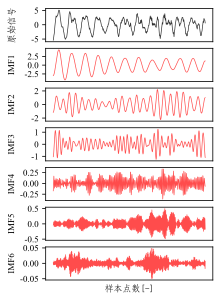

In [20]:
fig = plt.figure(figsize=(3,5))
plt.subplot(711)
plt.plot(data_01,linewidth = 0.7,color='black',alpha=0.8)
plt.yticks(fontproperties = 'Times New Roman', size = size)

plt.ylabel('原始信号', size = size)

plt.xticks([])
plt.subplot(712)
plt.plot(u[0],linewidth = 0.7,color='r',alpha=0.7)
plt.ylabel('IMF1', fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(713)
plt.plot(u[1],linewidth =0.7,color='r',alpha=0.7)
plt.ylabel('IMF2', fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(714)
plt.plot(u[2],linewidth = 0.7,color='r',alpha=0.7)
plt.ylabel('IMF3', fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(715)
plt.plot(u[3],linewidth = 0.7,color='r',alpha=0.7)
plt.ylabel('IMF4', fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(716)
plt.plot(u[4],linewidth = 0.7,color='r',alpha=0.7)
plt.ylabel('IMF5',fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(717)
plt.plot(u[5],linewidth = 0.7,color='r',alpha=0.7)
plt.ylabel('IMF6',fontproperties = 'Times New Roman',size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
# plt.subplot(818)
# plt.plot(u[6],linewidth = 0.7,color='r')
# plt.ylabel('IMF7', fontproperties = 'Times New Roman',size = 7.5)
# plt.yticks(fontproperties = 'Times New Roman', size = 7.5)

plt.xlabel('样本点数[-]', size = size)
plt.xticks(fontproperties = 'Times New Roman',size = size)

fig.align_ylabels() 
# plt.yticks(fontproperties = 'Times New Roman', size = 8)
# plt.tight_layout()
plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/VMD分解大.png', dpi=300, bbox_inches='tight')

C:\Users\shamrockyj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


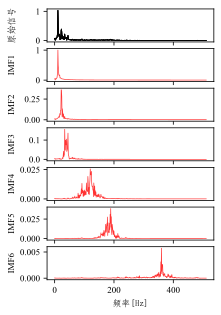

In [23]:
Fs = 1024
Ts = 1.0/Fs
t = np.arange(N)
k = np.arange(N)
T = N/Fs
frq = k/T
frq1 = frq[range(int(N/2))]
 
fig = plt.figure(figsize=(3,5))
for i in range(K):
    plt.subplot(K + 1, 1, 1)
    data_f = abs(np.fft.fft(data_01)) / N
    data_f1 = data_f[range(int(N / 2))]
    plt.plot(frq1, data_f1,linewidth = 0.7,color='black',alpha=0.8)
    plt.yticks(fontproperties = 'Times New Roman',size = size)
    plt.ylabel('原始信号',size = size)
#     plt.title("outer")
    plt.subplot(K+1, 1, i + 2)
    data_f2 = abs(np.fft.fft(u[i, :])) / N
    data_f3 = data_f2[range(int(N / 2))]
    plt.plot(frq1, data_f3,linewidth = 0.7,c='r',alpha=0.8)
    plt.yticks( fontproperties = 'Times New Roman',size = size)
    plt.xticks( fontproperties = 'Times New Roman',size = size)
#     plt.xlabel('pinlv(hz)')
    plt.ylabel('IMF{}'.format(i + 1),fontproperties = 'Times New Roman',size = size)
fig.align_ylabels() 
plt.xlabel('频率[Hz]', size = size)
# plt.tight_layout()
# plt.show()
plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/VMD频谱图大.png', dpi=300, bbox_inches='tight')

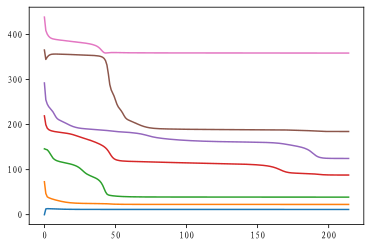

In [12]:
plt.plot(omega*1024)

In [13]:
omega[-1]*1024

array([ 11.58200846,  22.75479928,  38.9421457 ,  88.00967308,
       124.85234429, 184.75585548, 358.93560428])

In [24]:
x1 = u[0]
x2 = u[1]+u[2]+u[3]+u[4]
x3 = u[5]

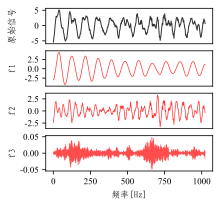

In [30]:
fig = plt.figure(figsize=(3,3))
plt.subplot(411)
plt.plot(data_01,linewidth = 1,color = 'black',alpha=0.8)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.ylabel('原始信号', size = size)
plt.xticks([])
plt.subplot(412)
plt.plot(x1,linewidth = 0.7,color='r',alpha=0.8)
plt.ylabel('f1', size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(413)
plt.plot(x2,linewidth =0.7,color='r',alpha=0.8)
plt.ylabel('f2', size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
plt.xticks([])
plt.subplot(414)
plt.plot(x3,linewidth = 0.5,color='r',alpha=0.7)
plt.ylabel('f3', size = size)
plt.xlabel('频率[Hz]', size = size)
plt.xticks(fontproperties = 'Times New Roman', size = size)
plt.yticks(fontproperties = 'Times New Roman', size = size)
fig.align_ylabels() 
plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/VMD重构大.png', dpi=300, bbox_inches='tight')

In [ ]:
# plt.savefig('C:/Users/shamrockyj/Desktop/毕设：航空发动机智能运维与健康管理/毕业论文/论文绘图/VMD分解.png', dpi=300, bbox_inches='tight')